In [46]:
# import the modules
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler



### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [47]:
# Code starts here
X_train = pd.read_csv('train.csv')

train = X_train.drop(['customerID', 'Id'],1)
X = train.drop('Churn',1)
y= X_train['Churn'].copy()

X.isnull().sum()
#X.info()
X['SeniorCitizen'].isnull().values.any()
X.head()

X.describe(include = 'all')
X.head()
# Code ends here

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2
1,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75
2,Female,0,No,No,17,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65
3,Female,1,No,No,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35
4,Male,0,Yes,No,23,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),59.95,1406


In [49]:
categorical = X.select_dtypes(include='object')
categorical

for cols in categorical:
    X[cols] =X[cols].astype('category').cat.codes
X.describe(include = 'all')
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,27,1,0,2,1,1,1,1,1,1,2,1,0,20.25,3622
1,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,2,19.75,1214
2,0,0,0,0,17,1,2,1,0,0,2,0,0,0,0,0,0,80.05,523
3,0,1,0,0,42,1,2,1,0,0,0,0,2,0,0,1,2,84.65,2474
4,1,0,1,0,23,1,0,0,2,0,0,0,0,2,0,1,0,59.95,613


### Visualize the data

- Replace the missing values and modify some column values(as required by you).
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [18]:
# Code starts here
# plt.boxplot(X['TotalCharges'],showmeans=True)
# plt.boxplot(X['MonthlyCharges'],showmeans=True)

#plt.hist(train['MonthlyCharges'], bins=15)
#plt.hist(X['TotalCharges'], bins=15)

plt.show()

X.info()
X.head()
# Code ends here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 19 columns):
gender              5634 non-null int8
SeniorCitizen       5634 non-null int64
Partner             5634 non-null int8
Dependents          5634 non-null int8
tenure              5634 non-null int64
PhoneService        5634 non-null int8
MultipleLines       5634 non-null int8
InternetService     5634 non-null int8
OnlineSecurity      5634 non-null int8
OnlineBackup        5634 non-null int8
DeviceProtection    5634 non-null int8
TechSupport         5634 non-null int8
StreamingTV         5634 non-null int8
StreamingMovies     5634 non-null int8
Contract            5634 non-null int8
PaperlessBilling    5634 non-null int8
PaymentMethod       5634 non-null int8
MonthlyCharges      5634 non-null float64
TotalCharges        5634 non-null int16
dtypes: float64(1), int16(1), int64(2), int8(15)
memory usage: 225.7 KB


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,27,1,0,2,1,1,1,1,1,1,2,1,0,20.25,3622
1,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,2,19.75,1214
2,0,0,0,0,17,1,2,1,0,0,2,0,0,0,0,0,0,80.05,523
3,0,1,0,0,42,1,2,1,0,0,0,0,2,0,0,1,2,84.65,2474
4,1,0,1,0,23,1,0,0,2,0,0,0,0,2,0,1,0,59.95,613


No     4120
Yes    1514
Name: Churn, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,27,1,0,2,1,1,1,1,1,1,2,1,0,20,3622
1,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,2,19,1214
2,0,0,0,0,17,1,2,1,0,0,2,0,0,0,0,0,0,80,523
3,0,1,0,0,42,1,2,1,0,0,0,0,2,0,0,1,2,84,2474
4,1,0,1,0,23,1,0,0,2,0,0,0,0,2,0,1,0,59,613


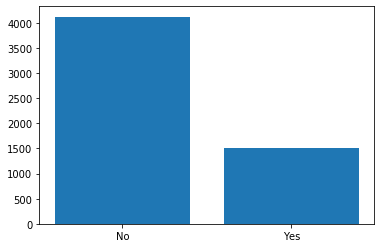

In [50]:
churndist = y.value_counts()
plt.bar(churndist.index, churndist)
print(churndist)

X['MonthlyCharges']=X['MonthlyCharges'].astype(int)
X.head()

### Model building

- Try to predict the churning of customers using AdaBoost
- Try and implement XGBoost for our customer churn problem and see how it performs in comparision to AdaBoost. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [23]:
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [51]:
# Code Starts here



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)
lr = LogisticRegression()

# Fit the model 
lr.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = lr.predict(X_test)

# roc score
roc_score = accuracy_score(y_pred,y_test)
print(roc_score)

# Code ends here

0.8001182732111177


In [52]:
dt = DecisionTreeClassifier(random_state = 4, max_depth=2)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred = dt.predict(X_test)

# ROC score
roc_score2 = accuracy_score(y_test,y_pred)
print(roc_score2)

0.7332939089296274


In [53]:
rfc = RandomForestClassifier(random_state=4)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

# roc score
roc_score3 = accuracy_score(y_test,y_pred)
print(roc_score3)

0.7740981667652277


In [54]:
xg = XGBClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            random_state=0,
            splitter='best'),
       base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


parameter_grid = {"max_depth": [3, 1],
              "max_features": [1, 5, 10,15,20],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              
              "criterion": ["mse", "mae"]}

#xgb_clf = XGBClassifier(base_estimator=dt_clf, random_state=0)

grid_search = GridSearchCV(xg,param_grid=parameter_grid )

grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.8007096392667061


In [55]:
xgboost = XGBClassifier()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100], #number of trees, change it to 1000 for better results
              
              'seed': [1337]}

grid_searchh = GridSearchCV(xgboost,param_grid=parameters )
grid_searchh.fit(X_train, y_train)

prediction = grid_searchh.predict(X_test)
acc = accuracy_score(y_test, prediction)
print(acc)

0.8024837374334713


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [57]:
# Code Starts here
test = pd.read_csv('test.csv')
testt = test.drop(['Id','customerID'],1)
testt.head()

categoricall = testt.select_dtypes(include='object')
categoricall
for cols in categoricall:
    testt[cols] =testt[cols].astype('category').cat.codes

testt['MonthlyCharges']=testt['MonthlyCharges'].astype(int)
testt.head()

pre = grid_searchh.predict(testt)

output = pd.DataFrame({'Id': test.Id, 'Churn': pre})
output.to_csv('XGBoost.csv', index=False)
output

# Code ends here

,Id,Churn
0,4539,No
1,1802,No
2,1380,No
3,5305,No
4,1960,No
...,...,...
1404,1416,No
1405,2115,No
1406,1078,No
1407,756,No
